We start the code session with the library imports that we are going to need

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import ipywidgets as widgets
from scipy.stats import norm
from mpl_toolkits import mplot3d
%matplotlib inline 

## Bivariate and Univariate normal distribution PDFs

### Normal Distribution for marginal Probability Density Function
The normal distribution , also known as the Gaussian distribution, is so called because its based on the Gaussian function . This distribution is defined by two parameters: the mean(μ) , which is the expected value of the distribution, and the standard deviation(σ), which corresponds to the expected deviation from the mean. The square of the standard deviation is typically referred to as the variance.

We denote this distribution as:
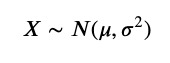


Given this mean and variance we can calculate the probability densitiy function (pdf) of the normal distribution with the normalised Gaussian function. For a value x the density is given by:
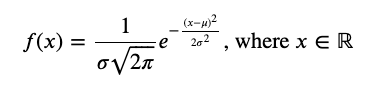

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the figure below:


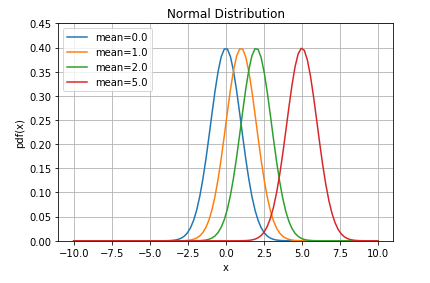

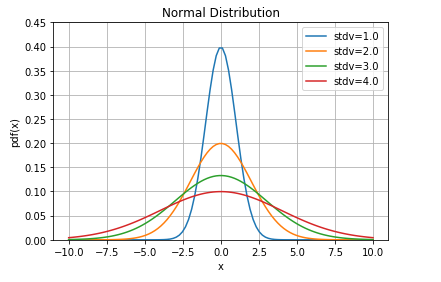

## Bivariate Normal Distribution
When we use two variables X1 and X2 for random distribution. Vriables X1 and X2 are bivariately normally distributed with mean vector components μ1 and μ2 and the standard deviation for two variables are σ1 and σ2.
The variables have correlation parameter denoted by ρ.
And Using these values we construct varance-covariance matrix as shown below:
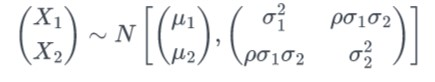

#### Joint Probability Density Function for Bivariate Normal Distribution
bivariate normal distribution is given by
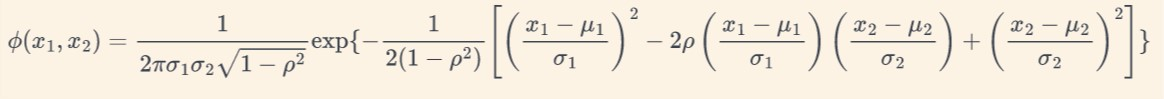

If use the covariance matrix as Σ and the ector for μ1 and μ2 as μ and X as the vector for [ x1, x2 ] we get the equation as below:
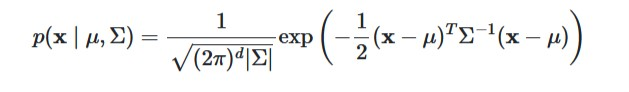

In [55]:
# Implementing the Bivariate Normal distribution function (as shown in above formula) for ploting the contour on floor using two variables
# mean - mean vector [mu1, mu2]
# x - Bivariate vector [[x1], [x2]]
# covariance - variance covariance vector
def pdf_BND(x, mean, covariance):
    # x_m  is the vector for (X - mu)
    x_m = x - mean
    return np.linalg.det((1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance)))) * 
            np.exp(-(np.matmul(np.matmul(x_m.transpose(), np.linalg.inv(covariance)), x_m) / 2)))

# Implementing the univariate Normal distribution (as shown in above formula) PDF for ploting the PDF for each variable in adjacent walls of the 3D graph
# x - is the point
# mean - mean of whole range of x
# variance - is the variance square of step-deviation
def pdf(x, mean, variance):
    return (1/np.sqrt(2* np.pi * variance) * np.exp( -((x - mean) ** 2)/(2*variance)))

#### Here the standard value are taken for reproducing the Bivariate Normal distribution curve

##### sigma_1 - is step deviation for variable 1 (You can change the value here)
##### sigma_12- is step deviation for variable 2 (You can change the value here)
##### Initial value of rho is taken 0, we will see later how changing values of rho effects the plot

In [59]:
plt.rcParams["figure.figsize"] = [8, 8]

# Initial value of mu vector
mu = [0, 0]

# Initial value of rho (correlation)
rho = 0

# Stepdeviation for variable 1 - is taken 1
sigma_1 = 1

# step deviation for variable 2 - is taken 1.25
sigma_2 = 1.25

# covariance matrix is constructed using sigma_1, sigma_2, rho
covariance = [
    [sigma_1**2, rho*sigma_1*sigma_2],
    [rho*sigma_1*sigma_2, sigma_2**2]
]

In [58]:
curve1_x = np.arange(-4, 4, 0.1)
curve1_y = np.array([4] * 80)
curve1_rand_x = norm.rvs(loc=mu[0], scale=np.sqrt(covariance[0][0]), size=1000)

In [56]:



curve2_y = np.arange(-4, 4, 0.1)
curve2_x = np.array([-4] * 80)
curve2_rand_y = norm.rvs(loc=mu[1], scale=np.sqrt(covariance[1][1]), size=1000)

mu[0] = np.mean(curve1_x)
mu[1] = np.mean(curve2_y)


#PDF of x
n1 = np.histogram(curve1_rand_x, density=True, bins=20);
heights = n1[0]
x_cord = n1[1][:20]

#PDF of y
n2 = np.histogram(curve2_rand_y, density=True, bins=20);
heights_2 = n2[0]
y_cord = n2[1][:20]





#Ploting the contour on floor
def bivariate_plot_points(rho):
    covariance = [
        [sigma_1**2, rho*sigma_1*sigma_2],
        [rho*sigma_1*sigma_2, sigma_2**2]
    ]
    length = len(curve1_x)
    z = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            z[i, j] = pdf_BND(np.matrix([[curve1_x[i]], [curve2_y[j]]]), mu, covariance)
    return z





def plot(mu1=mu[0], mu2=mu[1], rho=rho):
    ax = plt.axes(projection='3d')
    sns.set_style('whitegrid')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title('Bivariate Normal Distribution', fontsize=16)
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    ax.set_zlabel('p(X)', fontsize=18)
    mu[0] = mu1
    mu[1] = mu2
    ax.bar(x_cord, heights, zs=4, zdir='y', color='w', edgecolor='k', width=0.2, alpha=0.45);
    ax.bar(y_cord, heights_2, zs=-4, zdir='x', color='w', edgecolor='k', width=0.2, alpha=0.45);
    ax.plot3D(curve1_x, curve1_y, pdf(curve1_x, mu[0], covariance[0][0]), color='g');
    ax.plot3D(curve2_x, curve2_y, pdf(curve2_y, mu[1], covariance[1][1]), color='r');
    ax.contourf(curve1_x, curve2_y, bivariate_plot_points(rho), colors=['white','black'], alpha=0.6, levels=1000);

widgets.interact(plot, mu1=widgets.FloatSlider(
    value=mu[0],
    min=-3.99,
    max=3.99,
    step=0.01,
    description=r'$\mu_1$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
), mu2=widgets.FloatSlider(
    value=mu[1],
    min=-3.99,
    max=3.99,
    step=0.01,
    description=r'$\mu_2$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
), rho=widgets.FloatSlider(
    value=rho,
    min=-0.99,
    max=0.99,
    step=0.01,
    description=r'$\rho$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
))
























#z = np.array(pdf_BND(x, mu, covariance) for x in np.matrix(zip(curve1_x, curve2_y)))

#ax.contourf(curve1_x, curve2_y, z)
#ax.scatter(curve1_x, curve2_y, z, c='k');

interactive(children=(FloatSlider(value=-0.04999999999999649, description='$\\mu_1$:', max=3.99, min=-3.99, st…

<function __main__.plot(mu1=-0.04999999999999649, mu2=-0.04999999999999649, rho=0)>